In [1]:
import dLux
import poppy
import jax

In [2]:
from jax.config import config

In [3]:
config.update("jax_enable_x64", True)
config.update("jax_debug_nans", True)

In [4]:
from layers import *
from matplotlib import pyplot

In [5]:
hexagonal_basis = HexagonalBasis(
    nterms=9, 
    npix=256,
    rmax=1., 
    theta=0., 
    phi=0., 
    x=0., 
    y=0.)

In [52]:
coordinates = get_pixel_positions(256) * 2 / 256

In [53]:
zernikes = hexagonal_basis._zernikes(coordinates)

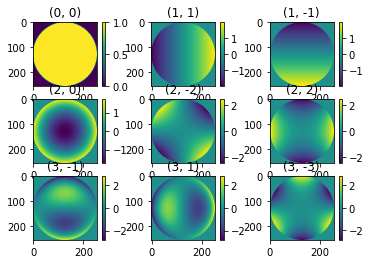

In [54]:
for i in range(9):
    n, m = hexagonal_basis._noll_index(np.array([i + 1]))
    pyplot.subplot(3, 3, i + 1)
    pyplot.title(f"{int(n), int(m)}")
    pyplot.imshow(zernikes[i])
    pyplot.colorbar()

In [58]:
p_zernikes = poppy.zernike.zernike_basis(9, 256, outside=0.)

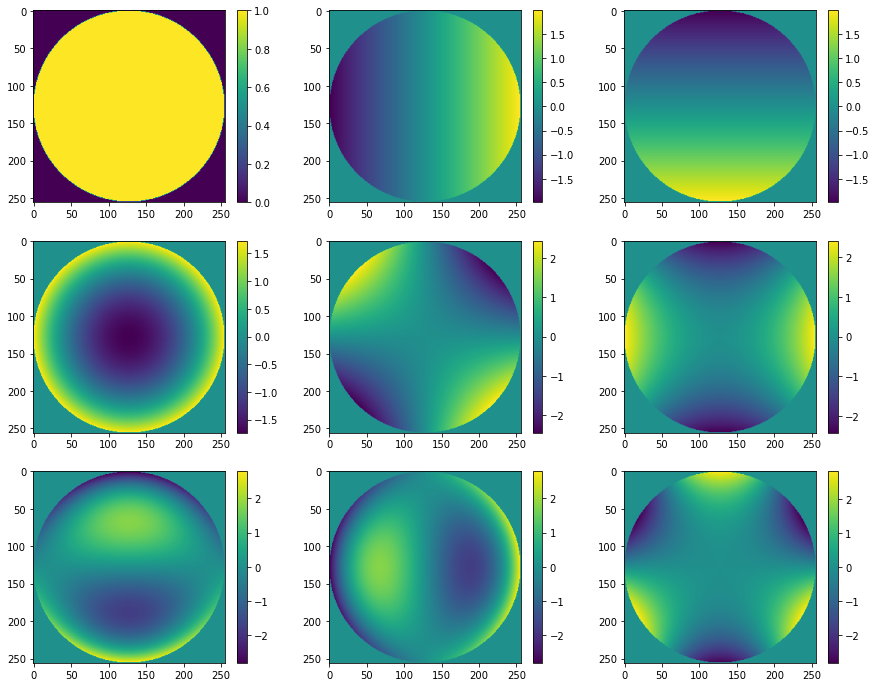

In [61]:
pyplot.figure(figsize=(15, 12))
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(p_zernikes[i])
    pyplot.colorbar()

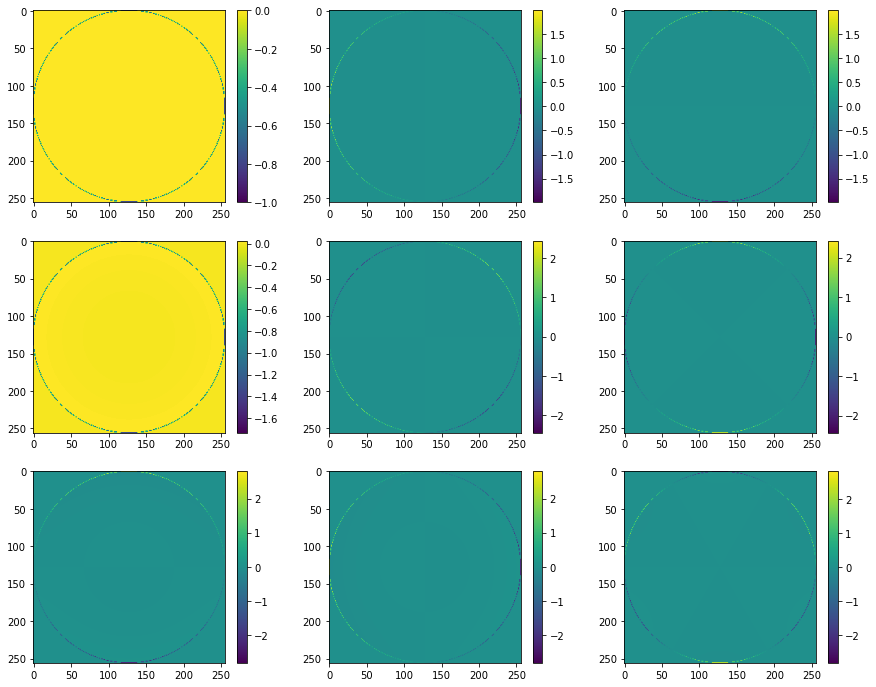

In [62]:
pyplot.figure(figsize=(15, 12))
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(p_zernikes[i] - zernikes[i])
    pyplot.colorbar()

In [12]:
# aperture = hexagonal_basis._aperture(coordinates)

In [13]:
# pyplot.imshow(aperture)

In [14]:
# hexagonal_basis = hexagonal_basis.set_theta(np.pi / 4)
# hexagonal_basis = hexagonal_basis.set_shear(-np.pi / 4)

In [15]:
# coordinates = hexagonal_basis._coordinates()

In [16]:
# aperture = hexagonal_basis._aperture(coordinates)

In [66]:
hexagonal_basis = HexagonalBasis(
    nterms=9, 
    npix=512,
    rmax=1., 
    theta=0., 
    phi=0., 
    x=0., 
    y=0.)

In [28]:
# hexagonal_basis = hexagonal_basis.set_theta(np.pi / 4)
# hexagonal_basis = hexagonal_basis.set_magnification(0.5)
# hexagonal_basis = hexagonal_basis.set_x_offset(0.5)
# hexagonal_basis = hexagonal_basis.set_y_offset(0.5)
# hexagonal_basis = hexagonal_basis.set_shear(np.pi / 12)

In [48]:
p_basis = poppy.zernike.hexike_basis(9, 256, outside = 0.)

In [86]:
# hexagonal_basis = hexagonal_basis.set_theta(np.pi / 4)
hexagonal_basis = hexagonal_basis.set_magnification(0.25)
hexagonal_basis = hexagonal_basis.set_x_offset(0.5)
hexagonal_basis = hexagonal_basis.set_y_offset(0.5)
# hexagonal_basis = hexagonal_basis.set_shear(0.)

basis = hexagonal_basis._basis()

hexagonal_basis = hexagonal_basis.set_magnification(0.25)
hexagonal_basis = hexagonal_basis.set_x_offset(-0.5)
hexagonal_basis = hexagonal_basis.set_y_offset(-0.75)

basis += hexagonal_basis._basis()

hexagonal_basis = hexagonal_basis.set_magnification(0.25)
hexagonal_basis = hexagonal_basis.set_x_offset(-0.5)
hexagonal_basis = hexagonal_basis.set_y_offset(1.25)

basis += hexagonal_basis._basis()

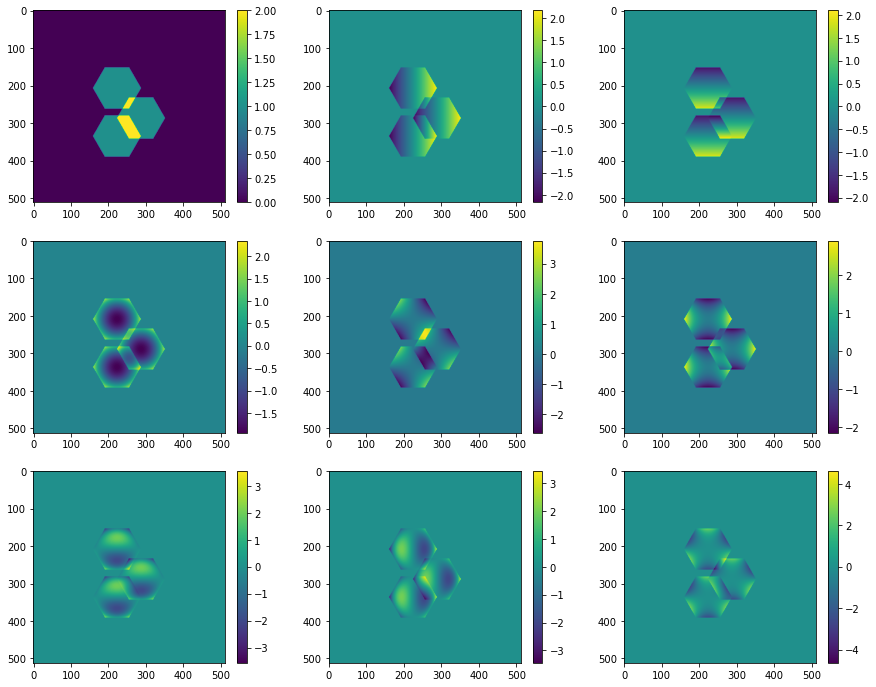

In [87]:
pyplot.figure(figsize=(15, 12))
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(basis[i])
    pyplot.colorbar()

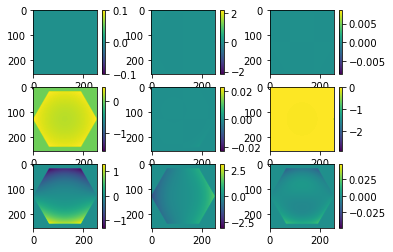

In [50]:
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(p_basis[i] - basis[i])
    pyplot.colorbar()